In [1]:
import numpy as np

In [38]:
def simulate_collision(gran_A, gran_B, t, delta_t):
    '''
    Assumptions : equal masses, no external forces
    params
        gran_X is a dictionary : v0, r0, R (ideally should also include force, so acceleration will be available)
    output 
        list of granule_A and granule_B positions
    '''
    t_iter = int(t/delta_t)
    pos_array = np.zeros((t_iter, 2))
    r_A = gran_A['r0']
    r_B = gran_B['r0']
    v_A = gran_A['v0']
    v_B = gran_B['v0']
    change_direction = False
    for i in range(0, t_iter):
        if(collision(r_A, gran_A['R'], r_B, gran_B['R']) and change_direction==False):
            change_direction = True
            v_A = -v_A
            v_B = -v_B
        r_A = r_A + v_A*delta_t
        r_B = r_B + v_B*delta_t
        pos_array[i][0] = r_A
        pos_array[i][1] = r_B
    return pos_array

def collision(r_A, R_A, r_B, R_B):
    return r_A + R_A >= r_B + R_B

In [61]:
gran_A = {'v0':0.25, 'r0':-1, 'R':0.3}
gran_B = {'v0':-0.25, 'r0':1, 'R':0.3}
t=5
delta_t=0.1
pos_array = simulate_collision(gran_A, gran_B, t, delta_t)

#for visualization
t_iter = int(t/delta_t)
t_array = np.linspace(0,t,t_iter)
pos_array_A = pos_array.T[0]
pos_array_B = pos_array.T[1]
print("time_step\tgranule_A_pos\tgranule_B_pos")
for i in range(t_iter):
    print(t_array[i],'\t',pos_array_A[i],'\t',pos_array_B[i])

time_step	granule_A_pos	granule_B_pos
0.0 	 -0.975 	 0.975
0.10204081632653061 	 -0.95 	 0.95
0.20408163265306123 	 -0.9249999999999999 	 0.9249999999999999
0.30612244897959184 	 -0.8999999999999999 	 0.8999999999999999
0.40816326530612246 	 -0.8749999999999999 	 0.8749999999999999
0.5102040816326531 	 -0.8499999999999999 	 0.8499999999999999
0.6122448979591837 	 -0.8249999999999998 	 0.8249999999999998
0.7142857142857143 	 -0.7999999999999998 	 0.7999999999999998
0.8163265306122449 	 -0.7749999999999998 	 0.7749999999999998
0.9183673469387755 	 -0.7499999999999998 	 0.7499999999999998
1.0204081632653061 	 -0.7249999999999998 	 0.7249999999999998
1.1224489795918369 	 -0.6999999999999997 	 0.6999999999999997
1.2244897959183674 	 -0.6749999999999997 	 0.6749999999999997
1.3265306122448979 	 -0.6499999999999997 	 0.6499999999999997
1.4285714285714286 	 -0.6249999999999997 	 0.6249999999999997
1.5306122448979593 	 -0.5999999999999996 	 0.5999999999999996
1.6326530612244898 	 -0.57499999999

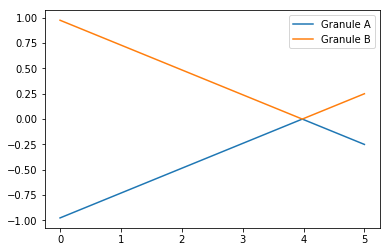

In [56]:
import matplotlib.pyplot as plt

plt.plot(t_array, pos_array_A, label='Granule A')
plt.plot(t_array, pos_array_B, label='Granule B')
plt.legend(loc='best')
plt.show()